<a href="https://colab.research.google.com/github/144fl/Mesin-Learning-1/blob/main/UAS/Codelab%20/Muhammad_Afif_Fadhlurrahman_1103210161_Mnist_Fashion_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


Nama : Muhammad Afif Fadhlurrahman

NIM : 1103210161

**UAS**

In [9]:

import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns

Dataset

In [10]:
(train_images, train_labels), (test_images, test_labels) = datasets.fashion_mnist.load_data()


train_images, test_images = train_images / 255.0, test_images / 255.0


4422102/4422102 [==============================] - 0s 0us/step


In [11]:

train_images = train_images.reshape((train_images.shape[0], 28, 28, 1))
test_images = test_images.reshape((test_images.shape[0], 28, 28, 1))

In [12]:

class_names = ['T-shirt/top', 'Shirt''Trouser', 'Sandal', 'Ankle boot', 'Coat',
               'Pullover', 'Trouser', 'Bag', 'Sneaker', 'Dress']

Menampilkan Gambar

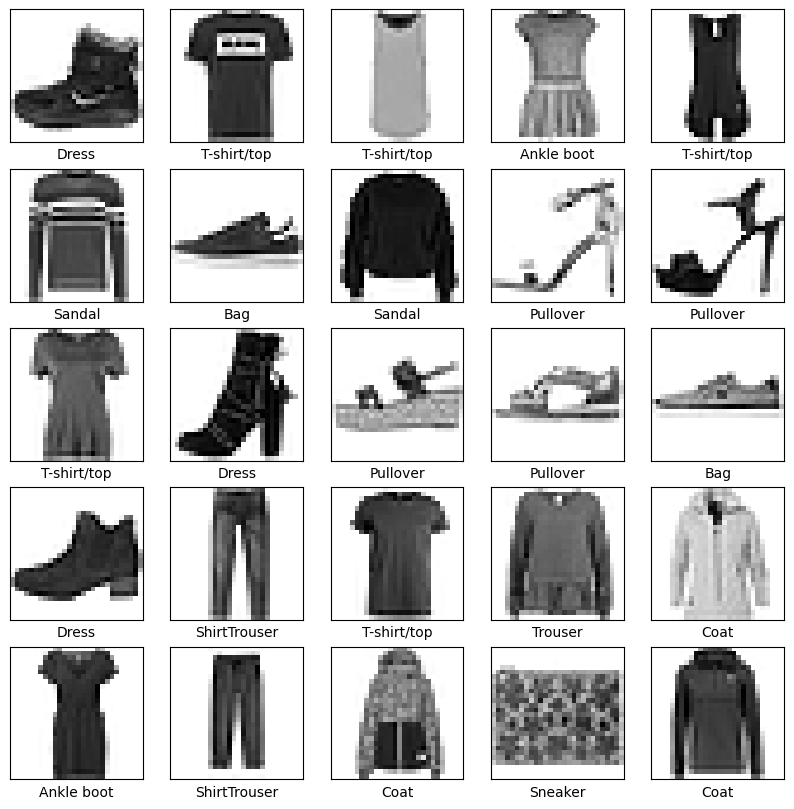

In [13]:

plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5, 5, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i].reshape(28, 28), cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

Membuat Arsitektur CNN

In [14]:

model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

Kompilasi Model

In [15]:

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

Melatih Model

In [16]:

history = model.fit(train_images, train_labels, epochs=10,
                    validation_data=(test_images, test_labels))

Epoch 1/10
1875/1875 [==============================] - 72s 38ms/step - loss: 0.5021 - accuracy: 0.8161 - val_loss: 0.3945 - val_accuracy: 0.8516
Epoch 2/10
1875/1875 [==============================] - 53s 28ms/step - loss: 0.3215 - accuracy: 0.8847 - val_loss: 0.3217 - val_accuracy: 0.8831
Epoch 3/10
1875/1875 [==============================] - 70s 37ms/step - loss: 0.2762 - accuracy: 0.8996 - val_loss: 0.2907 - val_accuracy: 0.8928
Epoch 4/10
1875/1875 [==============================] - 62s 33ms/step - loss: 0.2463 - accuracy: 0.9097 - val_loss: 0.2729 - val_accuracy: 0.8996
Epoch 5/10
1875/1875 [==============================] - 70s 37ms/step - loss: 0.2207 - accuracy: 0.9184 - val_loss: 0.2670 - val_accuracy: 0.9036
Epoch 6/10
1875/1875 [==============================] - 59s 31ms/step - loss: 0.2031 - accuracy: 0.9242 - val_loss: 0.2669 - val_accuracy: 0.9031
Epoch 7/10
1875/1875 [==============================] - 54s 29ms/step - loss: 0.1837 - accuracy: 0.9320 - val_loss: 0.2640 -

Evaluasi Model

In [17]:

test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)
print(f'Test accuracy: {test_acc * 100:.2f}%')


313/313 - 2s - loss: 0.2825 - accuracy: 0.9081 - 2s/epoch - 7ms/step
Test accuracy: 90.81%


Visualisasi

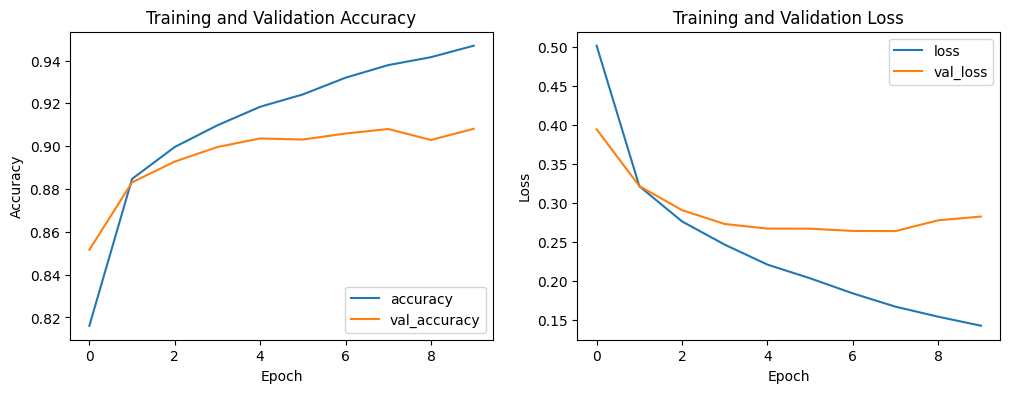

In [18]:

plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

Prediksi

In [19]:

predictions = model.predict(test_images)



313/313 [==============================] - 3s 8ms/step


Laporan Klasifikasi

In [20]:
predicted_labels = np.argmax(predictions, axis=1)
print(classification_report(test_labels, predicted_labels, target_names=class_names))


              precision    recall  f1-score   support

 T-shirt/top       0.87      0.84      0.85      1000
ShirtTrouser       0.99      0.98      0.99      1000
      Sandal       0.86      0.86      0.86      1000
  Ankle boot       0.92      0.90      0.91      1000
        Coat       0.81      0.90      0.85      1000
    Pullover       0.99      0.98      0.98      1000
     Trouser       0.74      0.73      0.73      1000
         Bag       0.95      0.98      0.96      1000
     Sneaker       0.99      0.96      0.98      1000
       Dress       0.98      0.96      0.97      1000

    accuracy                           0.91     10000
   macro avg       0.91      0.91      0.91     10000
weighted avg       0.91      0.91      0.91     10000



Confusion Matrix

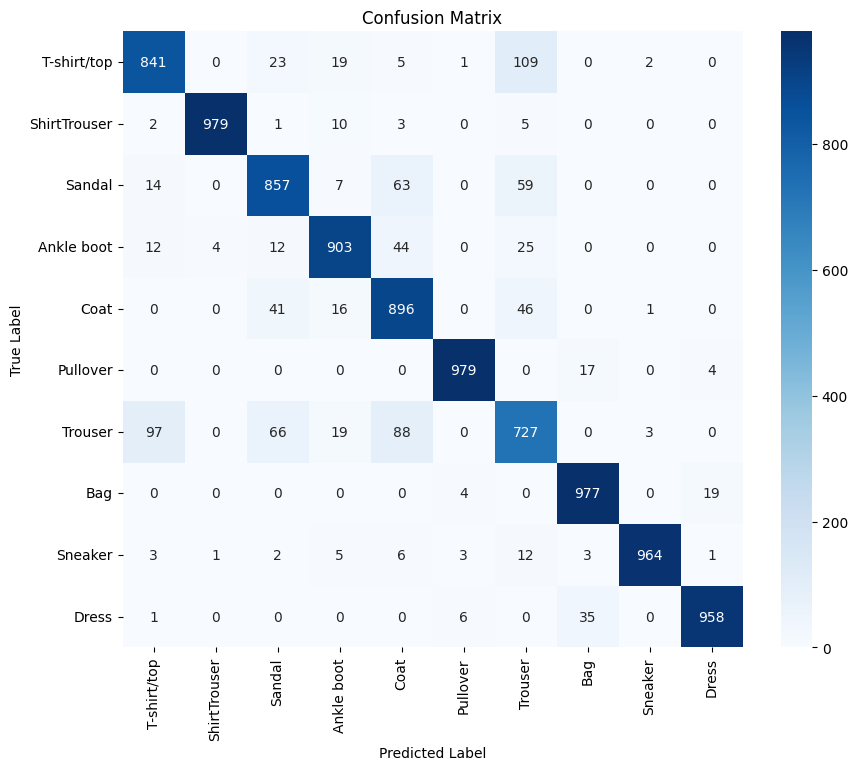

In [21]:
conf_matrix = confusion_matrix(test_labels, predicted_labels)
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()
